In [1]:
import numpy as np
from sklearn import datasets
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
# df_wine.columns = ['Class label', 
#                    'Alcohol', 
#                    'Malic acid', 
#                    'Ash',
#                    'Alcanlinity of Ash', 
#                    'Magnesium',
#                    'Total phenols',
#                    'Flavanoids',
#                    'Nonflavanoid phenols',
#                    'Proanthocyanins',
#                    'Color intensity', 
#                    'Hue',
#                    '0D280/0D315 of diluted wines',
#                    'proline']
df_wine


,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
from sklearn.model_selection import train_test_split

# X는 두번째부터 마지막 모든 열(13개)
# y는 데이터프레임에서 가장 첫번째 열(1개)
X, y = df_wine.iloc[:, 1:].values , df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.3, # test는 전체의 30%
                                                    random_state=0, 
                                                    stratify=y)

In [3]:
from sklearn.preprocessing import StandardScaler
# 표준화
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

PCA를 하는법은 아래와 같다.
1. 데이터셋을 일단 표준화한다.
2. 데이터셋의 공분산을 구한다.
3. 공분산의 고유벡터와 고유값을 구한다.
4. 고유값을 기준으로 내림차순 정렬후, 이 고유벡터중 몇개를 사용해서 차원을 축소할지 선택한다.
5. 변환행렬w를 구하고나면, 점곱 .dot(w)를 이용해서 샘플을 변환시켜준다.
- 끝 -

직접 PCA를 구현해서 코드짜보기

In [4]:
import numpy as np

cov_mat = np.cov(X_train_std.T) # wine 데이터셋의 공분산 구하기.
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) # wine 데이터셋의 공분산행렬의 고유벡터, 고윳값 쌍을 구하기
print('\n고윳값\n %s' % eigen_vals) 


고윳값
 [4.79500219 2.50003078 1.44306678 0.99901271 0.87517717 0.67821564
 0.53031813 0.35080209 0.28446498 0.11333093 0.14810971 0.18968162
 0.19934466]


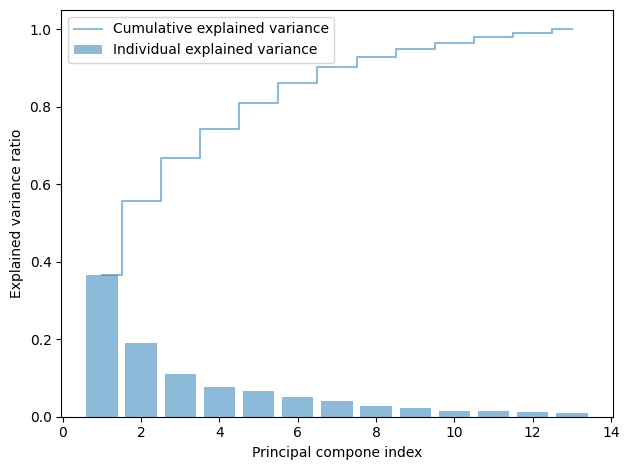

In [5]:
# 고윳값의 크기가 크다면, 그 고유벡터 방향으로 많은 정보를 내포하고 있다고 생각할수있다.
# 그럼으로 위의 고윳값들을 내림차순한다음 최상위 k 고유벡터를 선택
# 설명된 분산비율을 그래프로 그리기. 
# 누적된 데이터 설명 커버량을 보고 판단해서 몇개의 고유벡터를 사용할것인지 선택 (데이터를 최대한 보존하며 d -> k차원 축소가 목표)

tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)] # 전체 고윳값에 대해, 각각 고유값의 비율을 저장
cum_var_exp = np.cumsum(var_exp) #누적합 계산 함수

import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha = 0.5, align='center', label = 'Individual explained variance')    # 분산의 크기에 대한 막대그래프 
plt.step(range(1, 14), cum_var_exp, alpha = 0.5, where='mid', label = 'Cumulative explained variance')  # 누적 분포에 표현 계단그래프
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal compone index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

고윳값의 비율과, 그 누적분포 그래프를보면 처음 2개의 성분이 대략 데이터셋에 있는 분산의 60%를 설명한다는걸 알수있다.

In [6]:
# (고윳값, 고유벡터) 튜플의 리스트를 만든다.
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# 내림차순으로 이 튜플을 정렬한다.
eigen_pairs.sort(key=lambda k : k[0], reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('투영 행렬 W:\n', w) # w는 13x2 크기의 투영행렬이 될것이다.

투영 행렬 W:
 [[ 0.12221148 -0.49927666]
 [-0.24391049 -0.15419073]
 [ 0.00369454 -0.25170137]
 [-0.249647    0.12269609]
 [ 0.13011026 -0.31420427]
 [ 0.39099441 -0.05595656]
 [ 0.41649235  0.02637354]
 [-0.31569983 -0.07362469]
 [ 0.2982478   0.01094724]
 [-0.07304049 -0.53961007]
 [ 0.31641846  0.21061646]
 [ 0.37253046  0.23649287]
 [ 0.29514562 -0.38598117]]


나중에 2차원 산점도 그래프를 그리기 위해서 2개의 고유벡터만 선택했다. 실전에서는 계산효울과 모델 성능의 절충점을 찾아야할것이다.
이제 이 투영행렬을 원래의 샘플에 점곱을 하면 각 샘플의 데이터는 13차원 데이터에서 2차원 데이터로 차원이 축소된다.

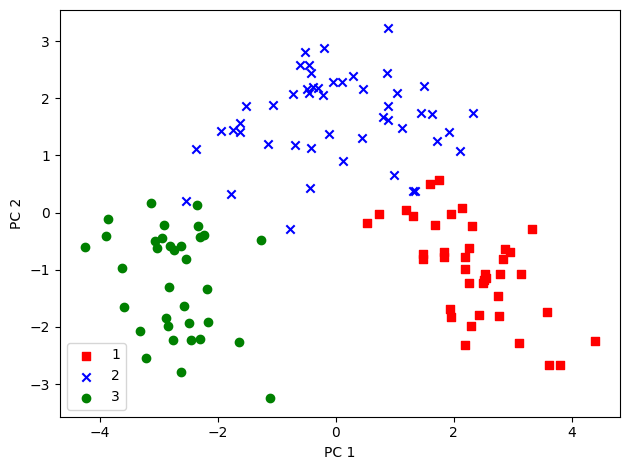

In [7]:
# 실제 모든 샘플에 대해 w점곲을 통해, 선형변환
X_train_pca = X_train_std.dot(w)

# 이제 와인의 클래쓰 1, 2, 3을 2차원 산점도 그래프로 표현해보자
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c = c,
                label = l,
                marker= m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


사이킷런 모듈을 이용해서 PCA적용후, 시각화해보기

/home/viplab/바탕화면/machine_learning_study/머신러닝교과서/데이터 전처리/특성추출/PDR.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  label=cl, edgecolor='black')


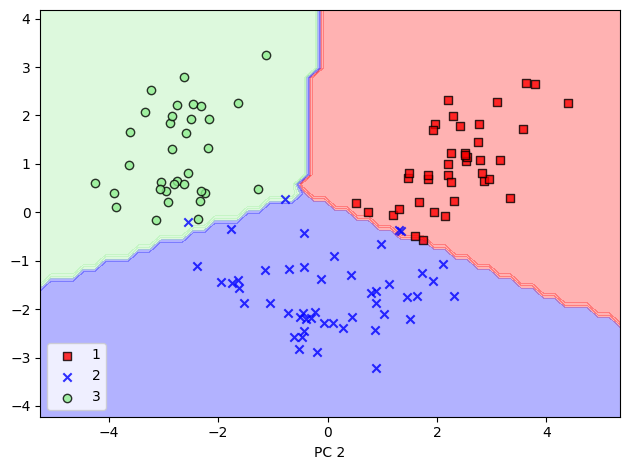

In [8]:
import PDR
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# PCA, 로지스틱회기 분류기 초기화
pca = PCA(n_components=2) #2차원으로 축소 명시
lr = LogisticRegression(random_state=1)

# 차원축소
X_train_pca = pca.fit_transform(X_train_std)
X_test_std = pca.fit_transform(X_test_std)

lr.fit(X_train_pca, y_train)

PDR.plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.xlabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

전체 주성분의 설명된 분산 비율을 알고싶을때는 n_component 속성을 None으로 지정해서 PCA클래쓰 객체를 만들면된다.
explained_variance_ratio 속성에서 모든 주성분의 설명된 분산비율을 확일할수있다.

In [9]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std) # 비지도학습임으로 y_train이 제공되지 않는다.
pca.explained_variance_ratio_

array([0.36584757, 0.19074656, 0.11010266, 0.07622236, 0.06677399,
       0.05174628, 0.04046205, 0.02676539, 0.02170402, 0.01520954,
       0.01447227, 0.01130043, 0.00864689])